## <font color=Grey>**Data Mind Classes**</font> 
### <font color=Black>Class 7: Logistic Regression </font> 

<div class="alert alert-block alert-info">

***Logistic Regression***


<div class="alert alert-block alert-info">

- Objective/Overview
- Cost function
- SGD
- Assumptions
- Metrics, Confusion Matrix, Accuracy, AUC-ROC
- Model Building Exercise
- Inference
- References

# 1. Overview

- Logistic regression is a method for classifying data into discrete outcomes. 
    - For example, we might use logistic regression to classify an email as spam or not spam. 
    - Whether an image is cat or dog
    - Churn or no-churn
- Model probability of each class given the input data
- In this module, we introduce the notion of classification, the cost function for logistic regression, and the application of logistic regression to multi-class classification.
- Linear Decision Boundary

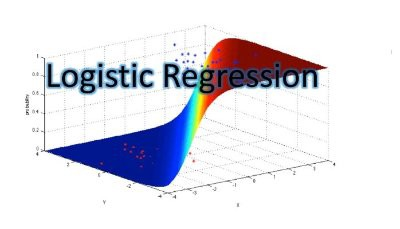

# 1.1 What is classification

Classification is prediction when the target variable is categorical or discreet:
- What color is this (green, blue, red)
- Is this email spam or not spam
- Is this a cat or a dog

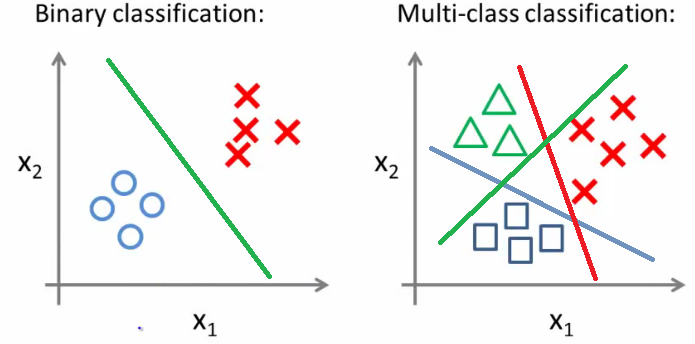

## 1.1.1 So why not use Linear Regression
    

- Suppose we have 2 classess we want to predict. Lets say email spam or not spam (0/1 variable)
- If we use linear regression then we violate the following:
    - Categorical data is not normally distributed and linear regression works best if target is normally distributed
    - Predictions can be any real values (beyond 1 or less than 0) which is not very useful in this case
    - Probabilities are often not linear in the sense of Linear Regression

## 1.1.1.1 So what do we do instead? 

Take below classification task and lets think about how we can draw a line that will separate the two colors

$ Y=1 $ $if$ $w^Tx+w0>0$ ; $else$ $Y=0 $

We will try to find out weight paramters that will give us such results:

Recall that $w^Tx+w0$ equation is Linear Regression
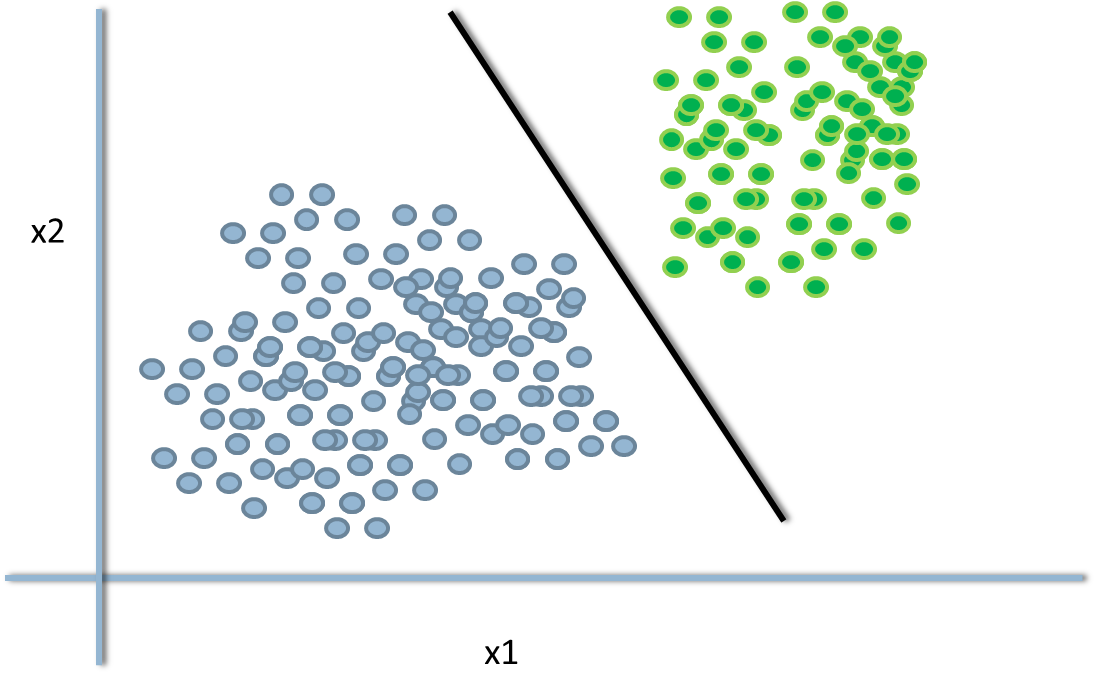

## 1.1.2 Odds ratio, Sigmoid Function

**Odds Ratio** = $ \frac{prob}{(1-prob)}$
    ; where $p$ = Probability of an event E

**Sigmoid Fn:** This function lets us take us linear regression form $w^Tx+w_0$ and helps us chuck it b/w (0,1)

Let:  $w^Tx+w_0$ = $g(x)$

Then:
$f(x)=\frac{1}{1+e^{-x}}$  : Where $f(x)$ is the sigmoid fn

Hence: $f(x)=\frac{1}{1+e^{-(w^Tx+w_0)}}$    ; $f(x)$ = prob of an event

**Note** - The value of $f(x)$ will always be between 0 and 1.

**Decision Rule** -
$$ p≥0.5,class=1 $$
$$ p<0.5,class=0 $$

** Note 2** - Our equation is linear in log of odds such that ---> $log(odds) = w^Tx+w_0$

## 1.1.3 Shape of Sigmoid Function

$ Sigmoid$ $(x) = \frac{1}{1+{e^{-x}}} $

At $x = 0$; $ Sigmoid$ $(x) = 0.5 $

At $x \to -\infty  $ ; $ Sigmoid$ $(x)  \to 0 $

At $x \to \infty  $ ; $ Sigmoid$ $(x)  \to 1 $

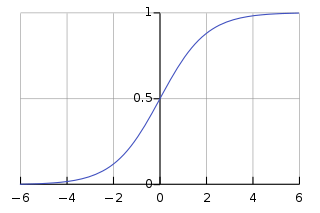

# 1.2 Binary Cross Entropy 



$ \hat{y} = \sigma(w^Tx+w_0)$ ; where $ \sigma(z) = \frac{1}{1+e ^{(-z)}}$

Now, we want our estimates or $\hat{y}$ to be as close to actual $y$. So our cost function should look at differences in these two and then penalize for the error term. 

**Squared error is a good choice, but it does not work well with gradient descent by introducing non-convexity**

**Loss fn:** $L(\hat{y},y) = -(ylog(\hat{y}) + (1-y)log(1-\hat{y}))$   : only for 1 row, we will sum for all rows in our dataset

**Cost Fn:** 
- $J(w,w_0) = \frac{1}{m}$ $\sum_{i=1}^{m}L(\hat{y_i},y_i) $
- $J(w,w_0) = \frac{-1}{m}$ $\sum_{i=1}^{m}(y_ilog(\hat{y_i}) + (1-y_i)log(1-\hat{y_i})) $

**Where: **
> - $y_i$ = Target value for $i_{th}$ example
> - $\hat{y_i}$ = Predicted value for $i_{th}$ example
> - $m$ is the number of examples in training set


# 1.3 Gradient Descent

**Generalized Cost Fn:** 

Let: 
- $\theta = (w,w_0)$
- $h_\theta(x_i)$ = Prediction for $i_{th}$ example

Where: 
$ h_\theta(x_i) = \frac{1}{1+e^{-\theta^Tx}}$

$J(\theta) = \frac{1}{m}$ $\sum_{i=1}^{m}(Cost(h_\theta(x_i),y_i) $

**Objective:**
> Find $\theta$ such that $\min_\theta J(\theta)$

Gradient Descent: 

**Repeat** {

$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)} {\partial \theta_j} $

where: 
$\alpha$ = Learning Rate or Learning Step with typical values range from $[0.001,1]$

(update all $\theta_j$ after each step)

}

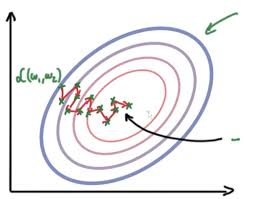

# 1.4 Assumptions (or lack thereof) in order of practical importance:

- Error terms **NEED NOT** be normally distributed
- Error terms must **NEED NOT HAVE** constant variance or homoskesdacity
- X or independent variables should not exhibit correlation
- Taget variable should be categorical/discreet

# 1.5 Walkthough on Titanic dataset

In [1]:
# https://www.kaggle.com/c/titanic/data

In [2]:
# 1.5.1 Import libs and load data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('C:/Users/rajneesh.tiwari/Downloads/titanic.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
## Summarize

from pandas_summary import DataFrameSummary
_ = DataFrameSummary(data_train)
_.columns_stats

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3
missing,0,0,0,0,0,177,0,0,0,0,687,2
missing_perc,0%,0%,0%,0%,0%,19.87%,0%,0%,0%,0%,77.10%,0.22%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


- Age, Cabin and Embarked have missing values
- Name is unique, meaning each value if different and no repeatations 


## EDA

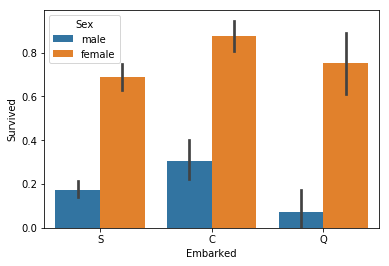

In [4]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);

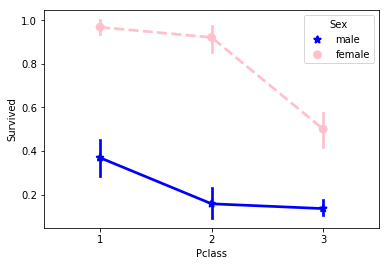

In [5]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

## Missing value imputation, Feature Engg

- It is recommended to try and convert numeric variables to logical categorical (one hot) representations as generally it leads to better model performance
- Impute all missing values in Age, Embarked, Cabin
- We will convert Age,Fare (after missing fill) to such brackets

In [6]:
## Missing imputation - Embarked

#Lets check which rows have null Embarked column
data_train[data_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Both have Passenger class 1 and fare 80. So maybe we can try and figure out which boarding point had most class 1 passengers and what was their median/mean fare. If it comes close to 80 then we will replace null with that boarding point

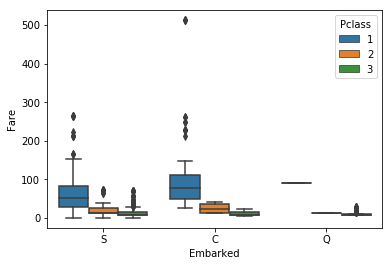

In [7]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=data_train);

We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'

In [8]:
data_train["Embarked"] = data_train["Embarked"].fillna('C')

In [9]:
## Missing imputation - Cabin
## We will drop cabin as it has more than 50% mising data

data_train.drop('Cabin',inplace=True,axis=1)

In [10]:
## Missing impuration Age - We will assign unknown category to missing age variable

In [11]:
# To replace fare in categories

data_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [12]:
### Generic function to bucketize age, Fare, prefix and lastname from name column

def simplify_ages(df):
    df['Age'] = df['Age'].fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

# def simplify_cabins(df):
#     df.Cabin = df.Cabin.fillna('N')
#     df.Cabin = df.Cabin.apply(lambda x: x[0])
#     return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    #df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,"Allen,",Mr.


# Some Final Encoding

- Convert all categorical variables to one hot represenatations 
- Note that we are working mainly with cateogry data (except Parch, SibSp) as we have converted all the numeric ones to buckets

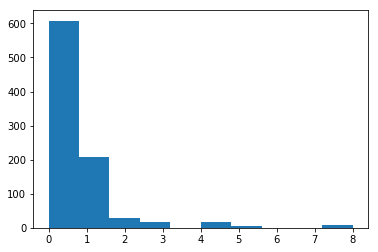

In [13]:
## plot of SibSp
plt.hist(data_train.SibSp);

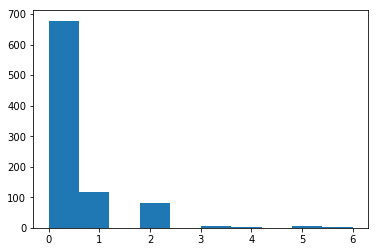

In [14]:
plt.hist(data_train.Parch);

In [15]:
#data_train.columns

In [16]:
from sklearn import preprocessing
def encode_features(df_train):
    cat_features = ['Fare', 'Age', 'Sex', 'Lname', 'NamePrefix']
    
    for feature in cat_features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train
    
data_train = encode_features(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,73,17
1,2,1,1,0,0,1,0,3,136,18
2,3,1,3,0,7,0,0,0,251,14
3,4,1,1,0,7,1,0,3,198,18
4,5,0,3,1,7,0,0,1,11,17


## Validation Setup : 80-20 split

In [17]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

sz = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=sz, random_state=23)

In [18]:
## Run model on train and evaluation on validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

LR = LogisticRegression(penalty='l2', C=1e50, fit_intercept=True)  ## high C means no regularization
LR.fit(X_train,y_train)

pred_prob  = LR.predict_proba(X_test)   ### gives probs
pred = LR.predict(X_test) ### gives labels directly
valid_acc = accuracy_score(y_test, pred)
auc_roc = roc_auc_score(y_test, pred)

print("validation accuracy is {}".format(valid_acc))
print("AUC ROC score is {}".format(auc_roc))

validation accuracy is 0.7877094972067039
AUC ROC score is 0.7585597826086956


#### Notice the penalty (l1,l2), and Cost parameters in the above - This refers to regularization which makes your model much more stable against overfitting.

#### We will cover this in advanced courses

In [19]:
## Confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(pred, y_test)

array([[99, 22],
       [16, 42]], dtype=int64)

In [20]:
tn, fp, fn, tp = confusion_matrix(pred, y_test).ravel()

print("True positive: {}".format(tp))
print("False positive: {}".format(fp))
print("True negative: {}".format(tn))
print("False negative: {}".format(fn))

True positive: 42
False positive: 22
True negative: 99
False negative: 16


# References
#### https://medium.com/deep-math-machine-learning-ai/chapter-2-0-logistic-regression-with-math-e9cbb3ec6077